In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"

data_train = pd.read_csv(train_file, engine='python')
data_test = pd.read_csv(test_file, engine='python')

- - -
# Data
- 가장 먼저 데이터의 구조를 확인해보겠다.
- Null data를 확인해보고 어떻게 처리할 것인지의 대해 생각해보자.

In [78]:
display(data_train.head())
print('Data(train) shape : {}'.format(data_train.shape))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data(train) shape : (1460, 81)


- 우리가 구하고자하는 label인 SalePrice의 그래프를 확인해보겠다.

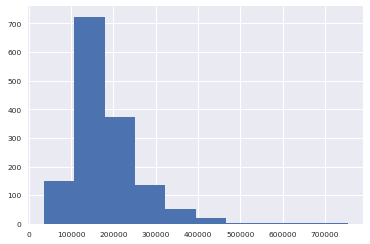

In [79]:
plt.hist(data_train.SalePrice)
plt.show()

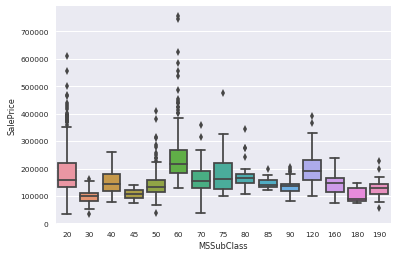

In [80]:
sns.boxplot(x='MSSubClass', y='SalePrice', data=data_train)

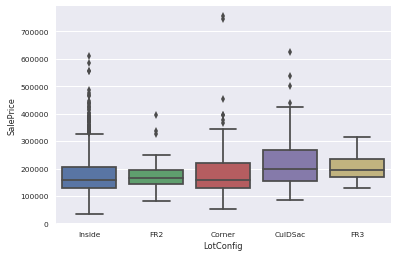

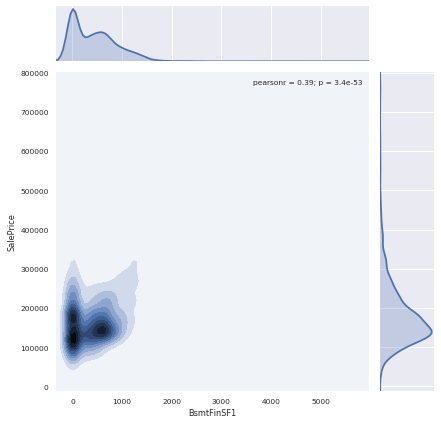

In [81]:
sns.boxplot(x='LotConfig', y='SalePrice', data=data_train)
sns.jointplot(x='BsmtFinSF1', y='SalePrice', data=data_train,kind='kde')

- - -
### Null 확인
-  column마다 null값의 개수를 확인
- null값으로 채워진 비율이 낮다면 해당 index를 삭제한다.(test dataset은 삭제하면 안된다!)
- null값으로 채워진 비율이 높다면 colunm을 삭제한다.
- null data를 어떻게 채우느냐에 따라 모델의 성능이 달라진다. 주어진 data를 간단히 분석해보자.

In [82]:
print('train dataset\n----------------')
tmp = data_train.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

print('\n\ntest dataset\n----------------')
tmp = data_test.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])
        
print('\ntrain data shape : {}'.format(data_train.shape))
print('test data shape : {}'.format(data_test.shape))

train dataset
----------------
LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


test dataset
----------------
MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1

train data shape : (1460, 81)
test data shape : (1459, 80)



train, test data 모두 Alley, PoolQC, Fence, MiscFeature에 대해 많은 결측값을 확인할 수 있었다.
<br>이 column와 SalePrice의 연관성을 확인해보고 학습에 영향을 많이 미치는지 생각해보자.

Alley
Grvl      50
None    1369
Pave      41
dtype: int64

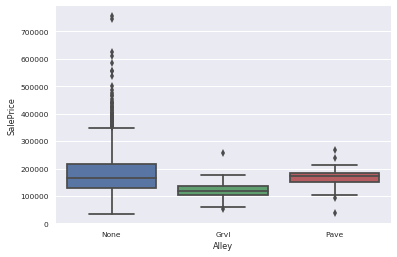

In [83]:
# 결측값을 'None' 이라는 category로 만들어준다.
data_train.Alley = data_train.Alley.fillna('None')
sns.boxplot(x='Alley', y='SalePrice', data=data_train)
display(data_train.groupby("Alley").size())

Alley의 Category마다 연관이 약간씩은 존재하지만 None이 1500개의 데이터 중 약 1400개를 차지한다.<br>
따라서 Alley columns을 drop하겠다.

In [10]:
data_train.drop(['Alley'], axis=1, inplace=True)
data_test.drop(['Alley'], axis=1, inplace=True)
display(data_train.shape)
display(data_test.shape)

(1460, 80)

(1459, 79)

Alley
Grvl      50
None    1369
Pave      41
dtype: int64

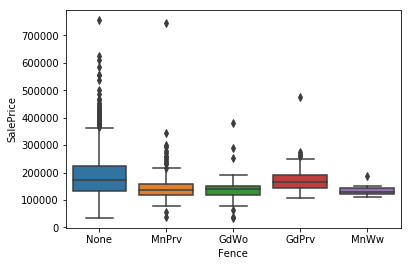

In [22]:
# 결측값을 'None' 이라는 category로 만들어준다.
data_train.Fence = data_train.Fence.fillna('None')
sns.boxplot(x='Fence', y='SalePrice', data=data_train)
display(data_train.groupby("Alley").size())

 Fence의 Category마다 연관이 약간씩은 존재하지만 None이 1500개의 데이터 중 약 1400개를 차지한다.
<br>따라서 Fence columns을 drop하겠다.

In [ ]:
data_train.drop(['Fence'], axis=1, inplace=True)
data_test.drop(['Fence'], axis=1, inplace=True)
display(data_train.shape)
display(data_test.shape)

PoolQC
Ex         2
Fa         2
Gd         3
None    1453
dtype: int64

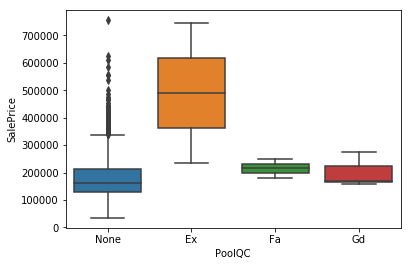

In [23]:
data_train.PoolQC = data_train.PoolQC.fillna('None')
sns.boxplot(x='PoolQC', y='SalePrice', data=data_train)
display(data_train.groupby("PoolQC").size())

 
PoolQC가 Ex인 경우 SalePrice가 높다는 것을 확인하였다. 하지만 Ex는 2개만 존재한다.<br>
따라서 PoolQC를 drop하겠다.

In [ ]:
data_train.drop(['PoolQC'], axis=1, inplace=True)
data_test.drop(['PoolQC'], axis=1, inplace=True)
display(data_train.shape)
display(data_test.shape)

Alley
Grvl      50
None    1369
Pave      41
dtype: int64

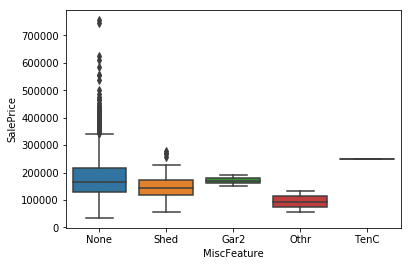

In [27]:
data_train.MiscFeature = data_train.MiscFeature.fillna('None')
sns.boxplot(x='MiscFeature', y='SalePrice', data=data_train)
display(data_train.groupby("Alley").size())

 Fence의 Category마다 연관이 약간씩은 존재하지만 None이 1500개의 데이터 중 약 1400개를 차지한다.
<br>따라서 Fence columns을 drop하겠다.

In [ ]:
data_train.drop(['MiscFeature'], axis=1, inplace=True)
data_test.drop(['MiscFeature'], axis=1, inplace=True)
display(data_train.shape)
display(data_test.shape)

 Id도 학습하는데에 전혀 연관이 없는 데이터이기 때문에 drop해준다.

In [84]:
#Save the 'Id' column
train_ID = data_train['Id']
test_ID = data_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)

 추가로 train data에서 Electrical column의 결측값이 딱 1개의 index에서만 발생하였기 때문에 해당 index를 삭제해주도록 하겠다.

In [85]:
# Electrical column에서의 결측값이 있는 index를 삭제
del_idx = data_train[data_train.Electrical.isnull() == True].index
data_train.drop(del_idx, axis = 0, inplace=True)

 방금 전 확인하였던 train data와 test data가 서로 빈 데이터를 가진 columns 자체가 다르다. 이로써 발생해주는 문제는 추후에 one-hot-encoding을 통해 categorical data를 dummy data로 만들었을때 서로 다른 columns을 가진 두개의 dataframe이 생긴다는 것이다. 따라서 이를 해결하기 위하여 먼저 처리해줄 내용은 아래와 같다.
 
 - train data 에서 label 값인 SalePrice를 미리 저장
 - train data와 test data를 merge
 - merge한 데이터에서 label인 SalePrice 제거
 - merge한 데이터에서 빈 데이터값을 확인하고 채워준 후에 다시 train data와 test data로 나누기

In [86]:
num_train = data_train.shape[0]
y_train = data_train.SalePrice

# 데이터를 합치고 index 재설정
data_all = pd.concat((data_train, data_test)).reset_index(drop=True)
display(data_all)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [ ]:
data_all.loc[17]

In [87]:
tmp = data_all.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

Alley 1352
BsmtCond 82
BsmtExposure 82
BsmtFinSF1 1
BsmtFinSF2 1
BsmtFinType1 79
BsmtFinType2 80
BsmtFullBath 2
BsmtHalfBath 2
BsmtQual 81
BsmtUnfSF 1
Exterior1st 1
Exterior2nd 1
Fence 2347
FireplaceQu 1419
Functional 2
GarageArea 1
GarageCars 1
GarageCond 159
GarageFinish 159
GarageQual 159
GarageType 157
GarageYrBlt 159
KitchenQual 1
LotFrontage 486
MSZoning 4
MasVnrArea 23
MasVnrType 24
MiscFeature 2813
PoolQC 2908
SalePrice 1459
SaleType 1
TotalBsmtSF 1
Utilities 2


 null값이 들어가있는 데이터를 확인하여 분석한 내용은 아래와 같다. -> 다음에 있는 값은 대체해줄 데이터이다.
 - Bsmt___ : (Category) -> 'None'
 - BsmtFinSF1 : FinType 1의 평방미터, Type1이 None인 경우 0.0으로 초기화되어있음 -> BsmtFinType1 isnull 확인 후 null이면 mean
 - BsmtFinSF2 : FinType 2의 평방미터, Type2이 None인 경우 0.0으로 초기화되어있음 -> BsmtFinType2 isnull 확인 후 null이면 mean
 - BsmtFullBath : fullbath 개수 -> 0.0
 - BsmtHalfBath : halfbath 개수 -> 0.0
 - BsmtUnfSF : Unfinished basement의 평방미터, 1개밖에 없으니 해당 index 삭제
 - Electrical : categorical data, None의 해당하는 data 없음, index 삭제
 - Exterior1st : categorical data, None의 해당하는 data 없음, index 삭제
 - Exterior2nd : categorical data, None의 해당하는 data 없음, index 삭제
 - FireplaceQu : 벽난로 품질(Category) -> 'None'
 - Functional :  categorical data, None의 해당하는 data 없음, index 삭제
 - GarageArea : 차고 넓이 (float) -> '0.0'
 - GarageCars : 차고에 차가 얼마나 들어가는지(Int) -> '0'
 - GarageCond : 차고 컨디션 -> 'None'
 - GarageFinish : 차고 내부공사 마무리 여부(Category) -> 'None'
 - GarageQual : 차고 품질(Category) -> 'None'
 - GarageType : 차고 타입(Category) -> 'None'
 - GarageYrBit : 차고 완공 년도(Int(year)) -> mean
 - KitchenQual : categorical data, None의 해당하는 data 없음, index 삭제
 - LotFrontage : 길과의 거리(float) -> mean
 - MSZoning : categorical data, None의 해당하는 data 없음, index 삭제
 - MasVnrType : 벽돌유형(Category) -> 'None'
 - MasVnrArea : 벽돌면적(float) -> mean
 - SaleType : index 삭제
 - TotalBsmtSF : index 삭제
 - Utilities : index 삭제
 
 
 

In [ ]:
data_all.head(20)

In [ ]:
data_all.BsmtFinSF1[data_all.BsmtFinSF1 == 0.0].index
# data_train.drop(['BsmtFinSF1'], axis=1, inplace=True)
# data_test.drop(['BsmtFinSF1'], axis=1, inplace=True)
# data_all.drop(['BsmtFinSF1'], axis=1, inplace=True)
# display(data_train.shape)
# display(data_test.shape)

In [ ]:
# data_train.drop(['BsmtFinSF2'], axis=1, inplace=True)
# data_test.drop(['BsmtFinSF2'], axis=1, inplace=True)
# data_all.drop(['BsmtFinSF2'], axis=1, inplace=True)
# display(data_train.shape)
# display(data_test.shape)

In [88]:
# BsmtFinSF1 : BsmtFinType1 isnull 확인 후 null이면 mean
data_all.BsmtFinSF1 = data_all.BsmtFinSF1.fillna(data_all.BsmtFinSF1.mean())

# BsmtFinSF2 : BsmtFinType2 isnull 확인 후 null이면 mean
data_all.BsmtFinSF2 = data_all.BsmtFinSF1.fillna(data_all.BsmtFinSF2.mean())

# BsmtFullBath : fullbath 개수 -> 0.0
data_all.BsmtFullBath = data_all.BsmtFullBath.fillna(0.0)

# BsmtHalfBath : halfbath 개수 -> 0.0
data_all.BsmtHalfBath = data_all.BsmtHalfBath.fillna(0.0)

# GarageArea : 차고 넓이 (float) -> '0.0'
data_all.GarageArea = data_all.GarageArea.fillna(0.0)

# GarageCars : 차고에 차가 얼마나 들어가는지(Int) -> '0'
data_all.GarageCars = data_all.GarageCars.fillna(0.0)

# GarageYrBit : 차고 완공 년도(Int(year)) -> mean
data_all.GarageYrBlt = data_all.GarageYrBlt.fillna(int(data_all.GarageYrBlt.mean()))


# LotFrontage : 길과의 거리(float) -> mean
data_all.LotFrontage = data_all.LotFrontage.fillna(data_all.LotFrontage.mean())

# MasVnrArea : 벽돌면적(float) -> mean
data_all.MasVnrArea = data_all.MasVnrArea.fillna(data_all.MasVnrArea.mean())

# BsmtUnfSF : Unfinished basement의 평방미터 -> mean
data_all.BsmtUnfSF = data_all.BsmtUnfSF.fillna(data_all.BsmtUnfSF.mean())

# Electrical : categorical data, None의 해당하는 data 없음
# Exterior1st : categorical data, None의 해당하는 data 없음
# Exterior2nd : categorical data, None의 해당하는 data 없음
# Functional : categorical data, None의 해당하는 data 없음
# KitchenQual : categorical data, None의 해당하는 data 없음
# MSZoning : categorical data, None의 해당하는 data 없음
# SaleType : Oth(other) 로 변경
data_all.SaleType = data_all.SaleType.fillna("Oth")

# TotalBsmtSF : 평방미터 -> mean
data_all.TotalBsmtSF = data_all.TotalBsmtSF.fillna(data_all.TotalBsmtSF.mean())

# fill nan to 'None'
data_all = data_all.fillna('None')

In [ ]:
data_all.head(20)

In [89]:
tmp = data_all.isnull().sum()

# nan값이 들어가있는 data가 있는지 확인하는 과정
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

display(data_all.shape)

# #reindex
# data_all = data_all.reset_index(drop=True)

(2918, 80)

In [90]:
for i in data_all.keys():
    if data_all[i].dtype == 'int' or data_all[i].dtype == 'float':
            data_all[i] = (data_all[i] - data_all[i].mean())/data_all[i].std()
            
display(data_all.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.774092,1.207311,-0.103331,None,0.169928,1Fam,TA,No,0.580469,0.580469,...,WD,-0.285939,Pave,0.986652,-0.444870,AllPub,-0.740490,1.046527,0.897081,0.157646
1,0.260679,-0.784581,-0.103331,None,0.169928,1Fam,TA,Gd,1.177566,1.177566,...,WD,-0.285939,Pave,-0.287546,0.476616,AllPub,1.614344,0.155138,-0.395176,-0.602704
2,-0.610975,1.235300,-0.103331,None,0.169928,1Fam,TA,Mn,0.097523,0.097523,...,WD,-0.285939,Pave,-0.287546,-0.299611,AllPub,-0.740490,0.980498,0.849219,0.157646
3,-0.506479,0.978733,-0.103331,None,0.169928,1Fam,Gd,No,-0.495183,-0.495183,...,WD,-0.285939,Pave,0.349553,-0.671837,AllPub,-0.740490,-1.858740,-0.682344,-1.363053
4,-0.037519,1.671464,-0.103331,None,1.385246,1Fam,TA,Av,0.468513,0.468513,...,WD,-0.285939,Pave,1.623750,0.211064,AllPub,0.776718,0.947484,0.753496,0.157646


- - -
# Categorical data 변환
 주어진 dataset의 feature들을 살펴보면 categorical data가 많이 존재한다. 이 데이터를 모델화시키고 학습시키기 위해서는 수치화하는 과정이 필요하다.
 <br>데이터들을 수치화하고 몇개의 field가 생성되는지 확인해보자.

In [91]:
# MSSubClass의 data는 categorical data이지만 int로 작성되어있다. 즉 이를 수치화하기 이전에 str로 변경하겠다.
data_all.MSSubClass = data_all.MSSubClass.apply(str)

In [ ]:
data_all.head()

 이제 categorical data를 one-hot-encoding 하기 전에 해주어야 하는 작업이 있다.
<br>SalePrice field에는 현재 train data에서 받아온 float와 test data에서 받아온 'None' 데이터가 동시에 존재한다.
<br>즉 one-hot-encoding을 진행하면 'None' index 때문에 float값까지 categorical data로 인식하여 굉장히 많은 field를 생성할 것이다.
<br>이를 막기위해 먼저 SalePrice field를 옮겨놓고 one-hot-encoding을 진행한 후에 다시 SalePrice df을 합치도록 하겠다.

In [101]:
# one-hot-encoding 전 saleprice 추출 후 저장
saleprice = data_all.SalePrice
data_all.drop("SalePrice", axis = 1, inplace = True)

In [ ]:
saleprice.head()

data_all 에서 SalePrice field를 제거한 후에 one-hot-encoding을 통한 수치화를 진행한다.
<br>수치화를 진행하고는 SalePrice를 다시 merge하고 data_all을 data_train과 data_test로 다시 나누는 작업이 필요하다.

In [102]:
# one-hot-encoding
data_all = pd.get_dummies(data_all)

# SalePrice field를 다시 merge
data_all['SalePrice'] = saleprice

display(data_all[data_all.SalePrice != "None"].index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', length=1459)

In [103]:
data_train = data_all.loc[:1458]
data_test = data_all.loc[1459:]

display(data_train.head())
display(data_train.tail())
display(data_test.head())
display(data_test.tail())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,SalePrice
0,-0.774092,1.207311,-0.103331,0.169928,0.580469,0.580469,1.086806,-0.249721,-0.934706,-0.359609,...,0,0,0,1,0,1,1,0,0,208500
1,0.260679,-0.784581,-0.103331,0.169928,1.177566,1.177566,-0.819023,3.821154,-0.629836,-0.359609,...,0,0,0,1,0,1,1,0,0,181500
2,-0.610975,1.235300,-0.103331,0.169928,0.097523,0.097523,1.086806,-0.249721,-0.288563,-0.359609,...,0,0,0,1,0,1,1,0,0,223500
3,-0.506479,0.978733,-0.103331,0.169928,-0.495183,-0.495183,1.086806,-0.249721,-0.047398,3.873602,...,0,0,0,1,0,1,1,0,0,140000
4,-0.037519,1.671464,-0.103331,1.385246,0.468513,0.468513,1.086806,-0.249721,-0.161155,-0.359609,...,0,0,0,1,0,1,1,0,0,250000


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,SalePrice
1454,-0.526868,0.834123,-0.103331,0.169928,-0.969348,-0.969348,-0.819023,-0.249721,0.892239,-0.359609,...,0,0,0,1,0,1,1,0,0,175000
1455,2.327672,-0.784581,-0.103331,0.169928,0.764867,0.764867,1.086806,-0.249721,0.064085,-0.359609,...,0,0,0,1,0,1,1,0,0,210000
1456,0.072075,1.902374,-0.103331,1.385246,-0.365666,-0.365666,-0.819023,-0.249721,0.719328,-0.359609,...,0,0,0,1,0,1,1,0,0,266500
1457,-0.208281,-0.784581,-0.103331,-1.045390,-0.861783,-0.861783,1.086806,-0.249721,-1.275979,1.383478,...,0,0,0,1,0,1,1,0,0,142125
1458,0.245387,-0.784581,-0.103331,0.169928,0.852675,0.852675,1.086806,-0.249721,-0.966558,-0.359609,...,0,0,0,1,0,1,1,0,0,147500


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,SalePrice
1459,-0.672144,-0.784581,-0.103331,-1.045390,0.058009,0.058009,-0.819023,-0.249721,-0.661688,-0.359609,...,0,0,0,1,0,1,1,0,0,None
1460,0.431442,-0.784581,-0.103331,0.169928,1.056829,1.056829,-0.819023,-0.249721,-0.352268,-0.359609,...,0,0,0,1,0,1,1,0,0,None
1461,-0.590586,0.850450,-0.103331,0.169928,0.767062,0.767062,-0.819023,-0.249721,-0.964283,-0.359609,...,0,0,0,1,0,1,1,0,0,None
1462,-0.595683,0.796804,-0.103331,0.169928,0.352167,0.352167,-0.819023,-0.249721,-0.538830,-0.359609,...,0,0,0,1,0,1,1,0,0,None
1463,0.306555,-0.784581,-0.103331,-1.045390,-0.392008,-0.392008,-0.819023,-0.249721,1.037849,-0.359609,...,0,0,0,1,0,1,1,0,0,None


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,SalePrice
2913,-1.564188,0.488924,-0.103331,0.169928,-0.969348,-0.969348,-0.819023,-0.249721,-0.033747,-0.359609,...,0,0,0,1,0,1,1,0,0,None
2914,-1.564188,0.488924,-0.103331,0.169928,-0.416156,-0.416156,-0.819023,-0.249721,-0.607084,-0.359609,...,0,0,0,1,0,1,1,0,0,None
2915,0.163828,-0.784581,-0.103331,1.385246,1.717587,1.717587,1.086806,-0.249721,-1.275979,-0.359609,...,0,0,0,1,0,1,1,0,0,None
2916,-0.483540,-0.784581,-0.103331,0.169928,-0.229563,-0.229563,-0.819023,3.821154,0.032233,-0.359609,...,0,0,0,1,0,1,1,0,0,None
2917,-0.417274,1.557175,-0.103331,0.169928,0.694620,0.694620,-0.819023,-0.249721,-0.734493,-0.359609,...,0,0,0,1,0,1,1,0,0,None


각 field와 label 사이의 연관성을 찾기 위하여 correlation matrix를 활용

1stFlrSF          0.605968
FullBath          0.560881
GarageArea        0.623423
GarageCars        0.640473
GrLivArea         0.708618
OverallQual       0.791069
TotRmsAbvGrd      0.533779
TotalBsmtSF       0.613905
YearBuilt         0.523273
YearRemodAdd      0.507430
BsmtQual_Ex       0.553093
ExterQual_TA     -0.589082
KitchenQual_Ex    0.504080
KitchenQual_TA   -0.519600
SalePrice         1.000000
Name: SalePrice, dtype: float64

(15,)

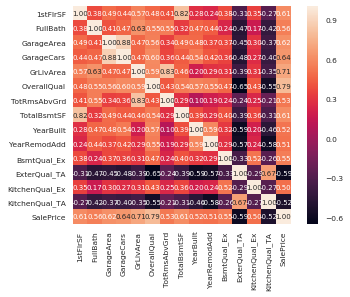

In [40]:
data_train.SalePrice = data_train.SalePrice.apply(float)

# Train data(dummy)로 corrmat 생성
corrmat = data_train.corr()

# 생성된 corrmat 중 SalePrice와의 연관이 0.5 이상인 columns 추출
corr_up = np.where(abs(corrmat['SalePrice'])>0.5)
predict_cols = corrmat['SalePrice'][list(corr_up[0])].keys()

display(corrmat['SalePrice'][predict_cols])
display(corrmat['SalePrice'][predict_cols].shape)

cm = np.corrcoef(data_train[predict_cols].values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}
                 , yticklabels=predict_cols.values, xticklabels=predict_cols.values)
plt.show()

In [71]:
y_train = data_train.SalePrice

data_train.drop("SalePrice", axis = 1, inplace = True)
data_test.drop("SalePrice", axis = 1, inplace = True)

ValueError: labels ['SalePrice'] not contained in axis

- - -
### log-transformation
 saleprice 정규화를 위한 log-transformation

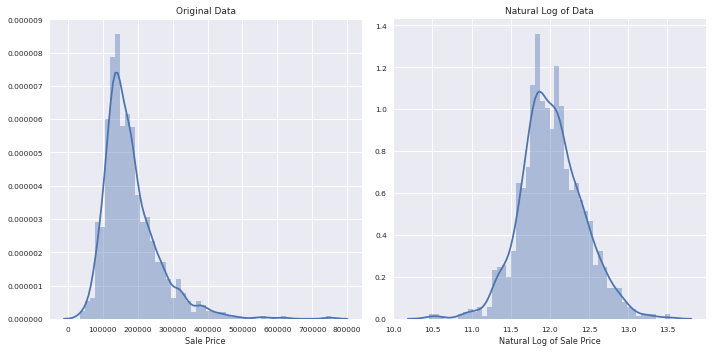

In [95]:
y_train_log = np.log(y_train)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(y_train_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

- - -
# data 정리
- - -

In [ ]:
# predict_cols = list(predict_cols)
# predict_cols.remove('SalePrice')

### score 도출해주는 함수 선언

In [96]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

- - -
# keras를 활용한 DNN 학습

In [97]:
import tensorflow as tf
from keras.models import Sequential
from keras import metrics
from keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer, mean_squared_error

### data 정의

In [98]:
from sklearn.model_selection import train_test_split
# data_train = data_train[predict_cols]
x_train_np = data_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = data_test.as_matrix()



### model 정의

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=x_train_np.shape[1], activation='relu'))
    tf.keras.layers.Dropout(0.2)
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [ ]:
model = create_model()

In [ ]:
for _ in range(0,10) :
    X_train, X_test, y_train, y_test = train_test_split(x_train_np, y_train_log, test_size=0.33, random_state=7)
    history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1000, batch_size=50)

In [ ]:
prediction = model.predict(data_test)

y_pred = model.predict(X_test)
display(y_pred.shape)
display(y_test.shape)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
print(rmsle(y_test,y_pred))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = data_test.index+2
submission['SalePrice'] = np.exp(prediction)
print(submission)

In [ ]:
submission.to_csv('./output_csv/kerasMNN_all_normalize_skewed.csv', index=False)

In [100]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_train, y_train_log)
clf = RandomForestRegressor(n_estimators=1000, n_jobs=-100, max_features=300)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(y_test1,y_pred))

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
clf.fit(data_train, y_train_log)

In [ ]:
y_pred = clf.predict(data_test)
y_pred = np.exp(y_pred)
y_pred

In [ ]:
my_submission = pd.DataFrame({'Id': data_test.index+2, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('randomforest_all_normalize_skewed.csv', index=False)

In [52]:
data_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.774092,1.207311,-0.103331,0.169928,0.580469,0.580469,1.086806,-0.249721,-0.934706,-0.359609,...,0,0,0,0,1,0,1,1,0,0
1,0.260679,-0.784581,-0.103331,0.169928,1.177566,1.177566,-0.819023,3.821154,-0.629836,-0.359609,...,0,0,0,0,1,0,1,1,0,0
2,-0.610975,1.235300,-0.103331,0.169928,0.097523,0.097523,1.086806,-0.249721,-0.288563,-0.359609,...,0,0,0,0,1,0,1,1,0,0
3,-0.506479,0.978733,-0.103331,0.169928,-0.495183,-0.495183,1.086806,-0.249721,-0.047398,3.873602,...,0,0,0,0,1,0,1,1,0,0
4,-0.037519,1.671464,-0.103331,1.385246,0.468513,0.468513,1.086806,-0.249721,-0.161155,-0.359609,...,0,0,0,0,1,0,1,1,0,0


In [104]:
import xgboost as xgb

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_train, y_train_log)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=3300,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train1, y_train1)
y_pred = model_xgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(y_test1,y_pred))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields SalePrice

In [ ]:
model_xgb.fit(data_train, y_train_log)
y_pred = model_xgb.predict(data_test)
y_pred = np.exp(y_pred)
print(y_pred)
my_submission = pd.DataFrame({'Id': data_test.index+2, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/xgb_all_normalize_skewed.csv', index=False)

In [ ]:
import tensorflow as tf
from sklearn.cross_validation import train_test_split

In [ ]:
COLUMNS = data_train.keys()
COLUMNS = COLUMNS.drop('Exterior1st_Wd Sdng')
COLUMNS = COLUMNS.drop('Exterior2nd_Brk Cmn')
COLUMNS = COLUMNS.drop('Exterior2nd_Wd Sdng')
COLUMNS = COLUMNS.drop('Exterior2nd_Wd Shng')
COLUMNS = COLUMNS.drop('MSZoning_C (all)')
COLUMNS = COLUMNS.drop('RoofMatl_Tar&Grv')


FEATURES = data_train.keys()
FEATURES = FEATURES.drop('Exterior1st_Wd Sdng')
FEATURES = FEATURES.drop('Exterior2nd_Brk Cmn')
FEATURES = FEATURES.drop('Exterior2nd_Wd Sdng')
FEATURES = FEATURES.drop('Exterior2nd_Wd Shng')
FEATURES = FEATURES.drop('MSZoning_C (all)')
FEATURES = FEATURES.drop('RoofMatl_Tar&Grv')

#COLUMNS = COLUMNS.drop('')
#FEATURES = FEATURES.drop('')



LABEL = "SalePrice"


In [ ]:
# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Training set and Prediction set with the features to predict
training_set = data_train[COLUMNS]
prediction_set = data_train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# # Training for submission
# training_sub = training_set[col_train]

In [ ]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()
y_test.head()

In [ ]:
# Model
tf.logging.set_verbosity(tf.logging.ERROR)
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])#,
                                         #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))

In [ ]:
# Reset the index of training
training_set.reset_index(drop = True, inplace =True)

In [ ]:
def input_fn(data_set, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
        return feature_cols

In [ ]:
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(data_train), steps=2000)

In [ ]:
# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(data_test), steps=1)

In [ ]:
# Display the score on the testing set
# 0.002X in average
loss_score1 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score1))

In [ ]:
import itertools
# Predictions
y = regressor.predict(input_fn=lambda: input_fn(data_test))
predictions = list(itertools.islice(y, data_test.shape[0]))
predictions[0]

In [ ]:
my_submission = pd.DataFrame({'Id': data_test.index+2, 'SalePrice': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('tensor_all_normalize_skewed.csv', index=False)